In [1]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/0l/7p55840534935525wycd_n2m0000gn/T/ipykernel_30422/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
grocery_data = pd.read_csv('/Users/rowanahmed/Downloads/GroceryDataset.csv')
grocery_data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rowanahmed/Downloads/GroceryDataset.csv'

In [5]:

grocery_data.describe()


,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
count,1757,1754,1757,682,1757,1752,1739,1715
unique,19,184,42,483,1484,1,1401,1435
top,Snacks,$14.99,No Discount,No Reviews,"Ziploc Seal Top Freezer Bag, Gallon, 38-count,...",$,Pick Your Arrival Date at Checkout Gift Mess...,Item may be available in your local warehouse ...
freq,293,81,1626,61,4,1752,7,5


In [18]:

#grocery_data = grocery_data.dropna()
grocery_data.isna().sum()
grocery_data.duplicated().sum()


,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1740,False,False,False,False,False,False,False,False
1746,False,False,False,False,False,False,False,False
1748,False,False,False,False,False,False,False,False
1749,False,False,False,False,False,False,False,False


In [19]:
popularity = grocery_data['Sub Category'].value_counts()
print(popularity)

Sub Category
Meat & Seafood                  142
Gift Baskets                     84
Floral                           75
Seafood                          46
Pantry & Dry Goods               45
Snacks                           41
Cleaning Supplies                39
Coffee                           35
Bakery & Desserts                33
Beverages & Water                23
Candy                            22
Deli                             20
Kirkland Signature Grocery       19
Laundry Detergent & Supplies     17
Paper & Plastic Products         14
Organic                           8
Poultry                           8
Breakfast                         2
Name: count, dtype: int64


In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [26]:

transactions = grocery_data.loc[:,['Title', 'Sub Category']].values.tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert to DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.0001, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:\n", frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.0001)

# Display the association rules
print("Association Rules:\n", rules)




Frequent Itemsets:
        support                                           itemsets
0     0.002972  ( Northwest Fish Wild Alaskan Sockeye Salmon F...
1     0.001486  (100% Spring Water, 2.5 Gallon, 2-count, 48 Ca...
2     0.001486                 (100-stem Assorted Green Fillers )
3     0.001486                           (100-stem Baby's Breath)
4     0.001486                              (100-stem Carnations)
...        ...                                                ...
1247  0.001486  (Snacks, Shrimp Chips with Garlic and Butter 1...
1248  0.001486  (Snacks, Sonoma Creamery Pepper Jack Crisps, 1...
1249  0.001486  (Snacks, St Michel Madeleine, Classic French S...
1250  0.001486  (Snacks, The Gluten Free Brothers Variety Bars...
1251  0.001486  (Snacks, The Gluten Free Brothers Variety Bite...

[1252 rows x 2 columns]
Association Rules:
                                             antecedents  \
0                                      (Meat & Seafood)   
1     ( Northwest Fish Wi

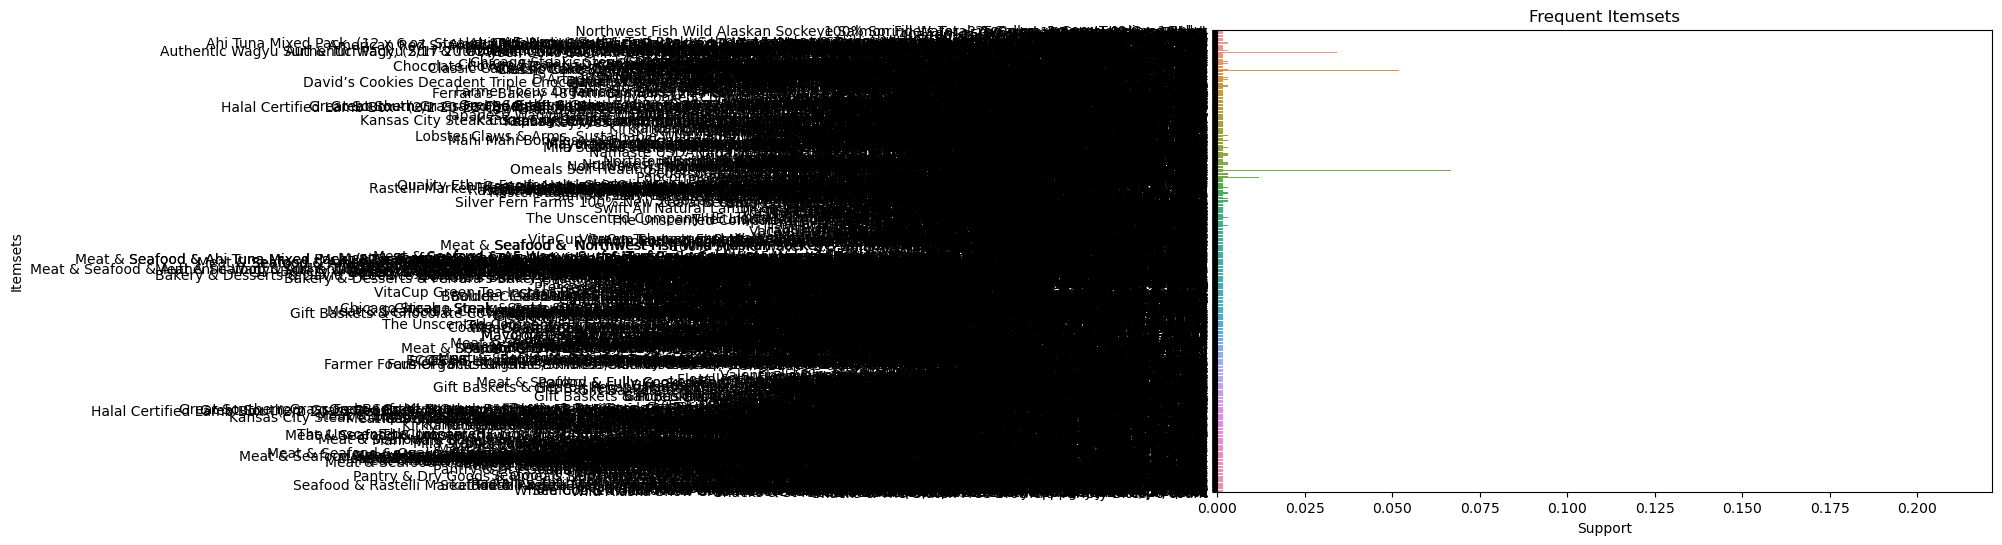

In [27]:
plt.figure(figsize=(10, 6))
support = frequent_itemsets['support']
itemsets = frequent_itemsets['itemsets'].apply(lambda x: ' & '.join(list(x)))

sns.barplot(x=support, y=itemsets)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

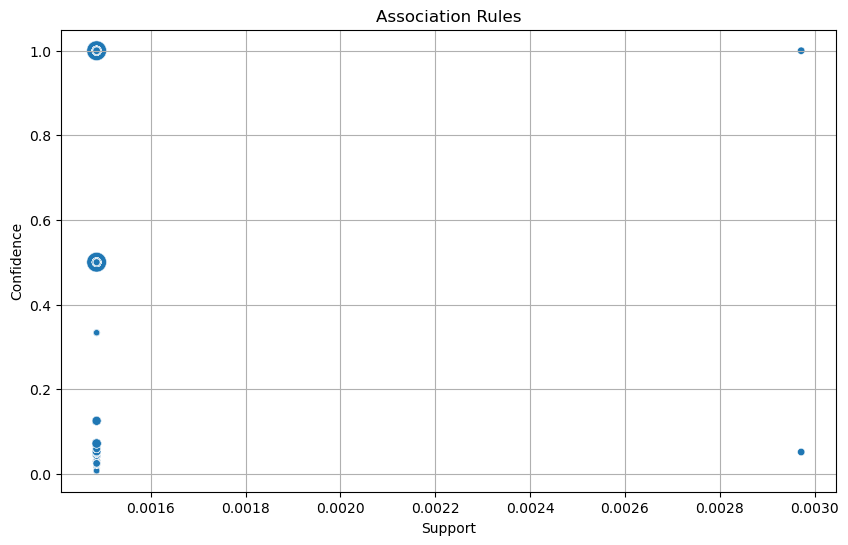

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 200))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.grid(True)
plt.show()

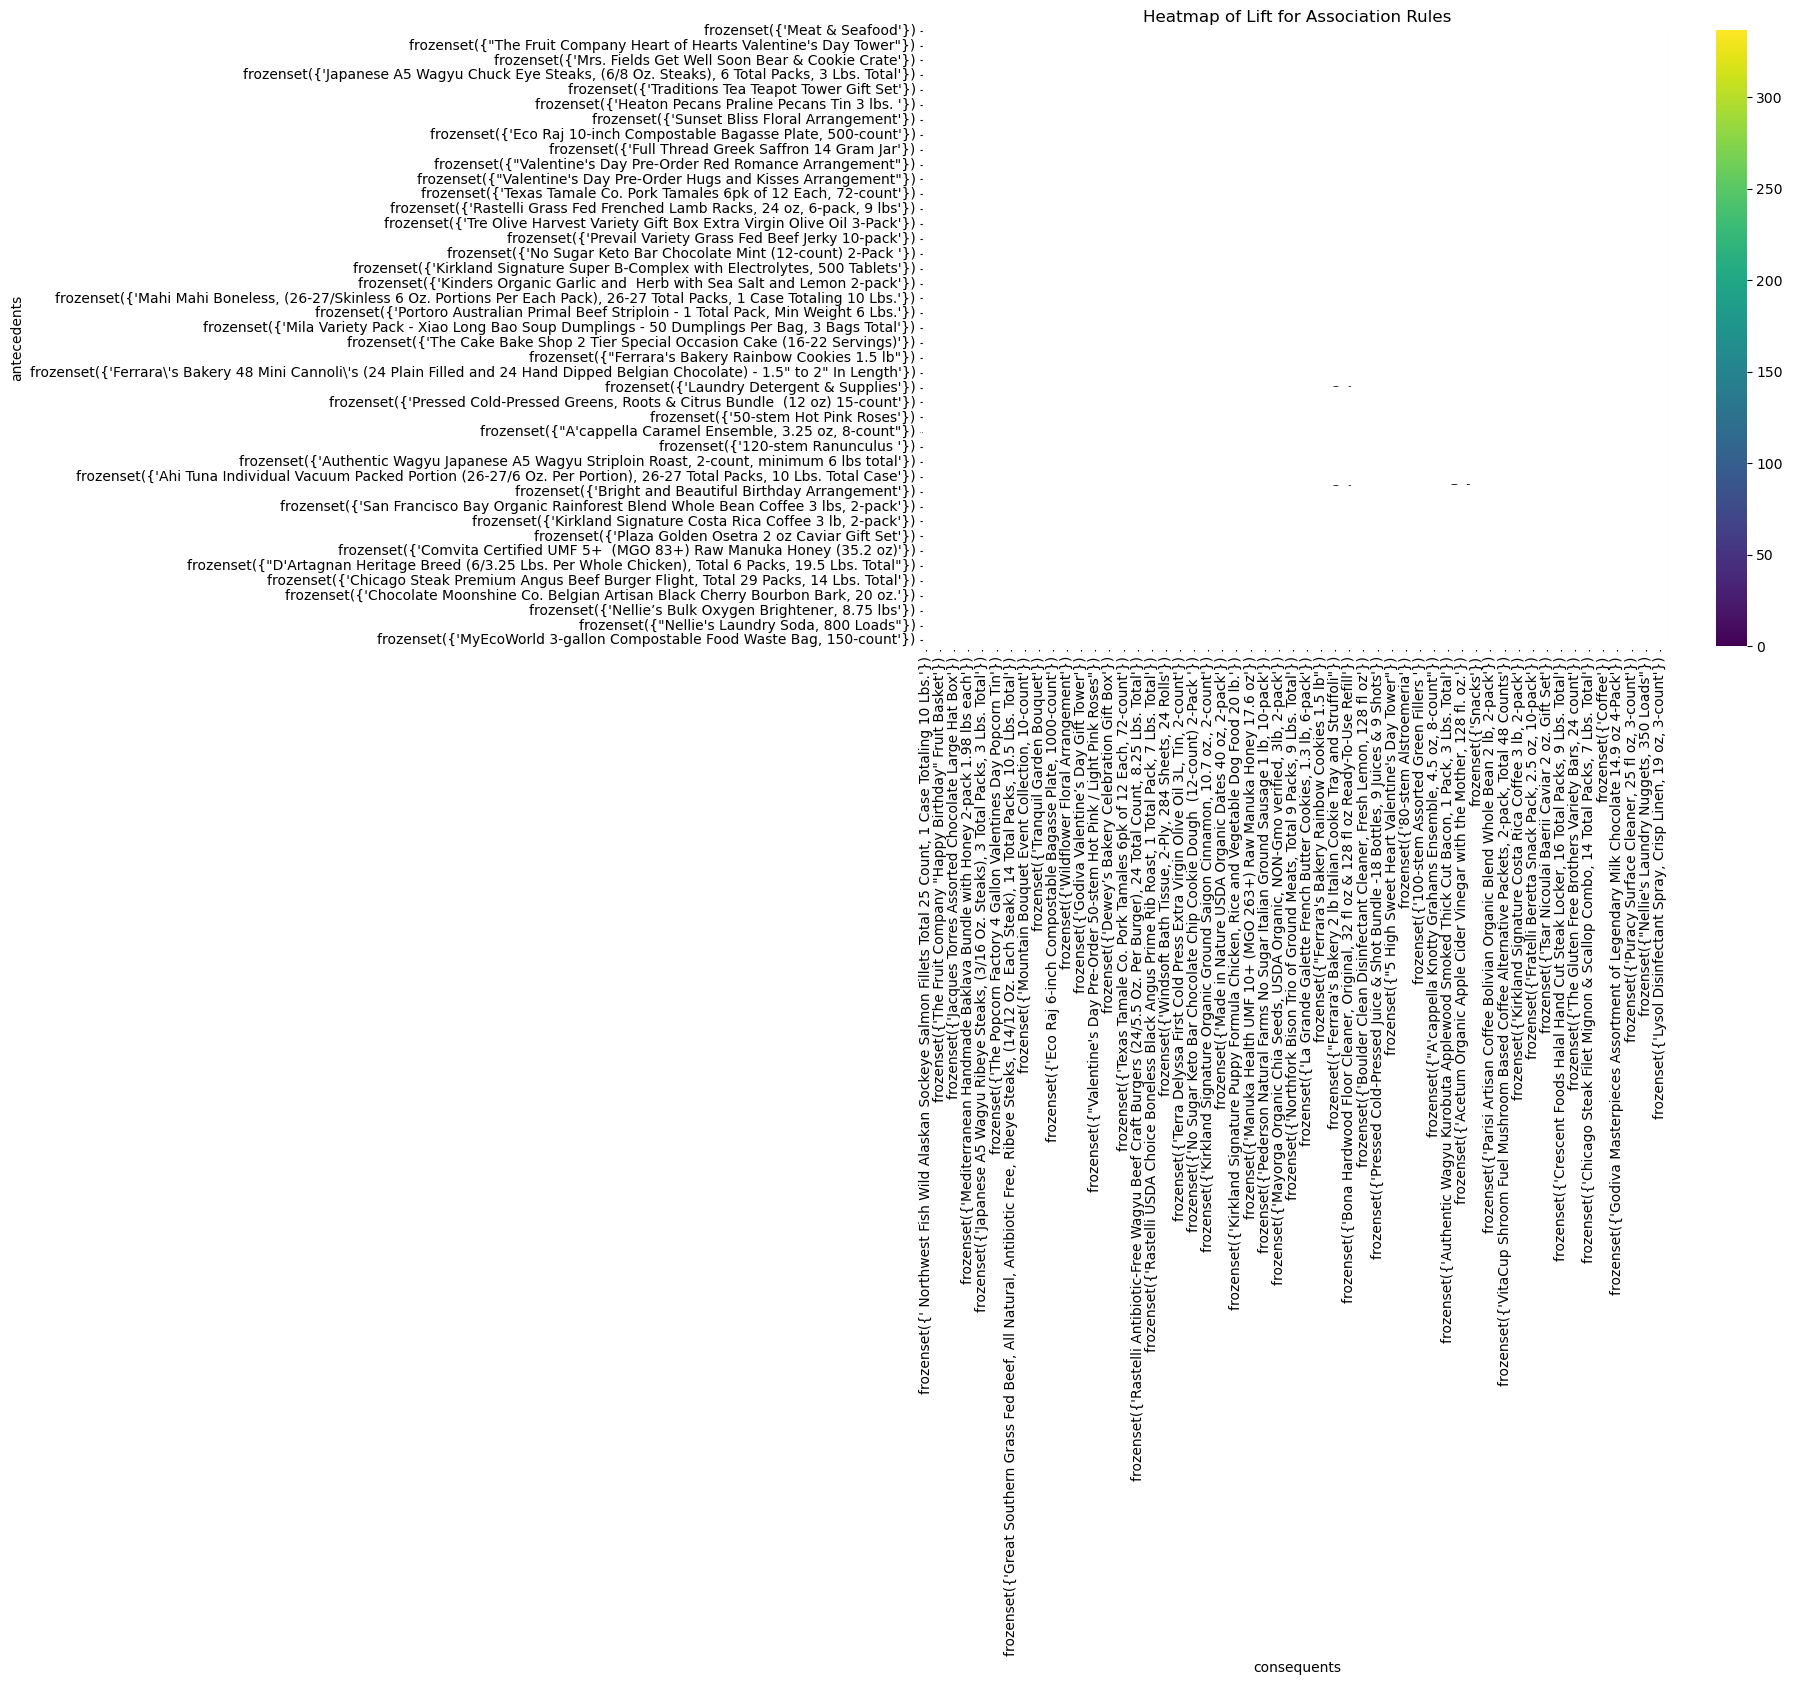

In [29]:
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of Lift for Association Rules')
plt.show()